### Arden Sentak
### I pledge my honor that I have abided by the Stevens Honor System.

### Step 1: Loading the Dataset + Exploratory Data Analysis (EDA)
Our data is from the following CSV file: healthcare-dataset-stroke-data.csv. For the data file to be loaded in Jupyter noteboook, it needs to be in the same folder as the .ipynb file

It can be downloaded from the following Kaggle link: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#Loading dataset (healthcare-dataset-stroke-data.csv)
strokeData = pd.read_csv("healthcare-dataset-stroke-data.csv")

#Verifying the data loaded properly (printing first couple rows)
display(strokeData.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#printing general info about the data
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Analysis: The data has 12 total columns (10 features, 1 stroke predictor column, 1 id column). The only column with missing values is bmi. 
The following categories are numerical: age, hypertension, heart_disease, avg_glucose_level, bmi, stroke. 
The following catergories are categorical: gender, ever_married, work_type, residence_type, smoking_status. Age, avg_glucose_level, and bmi are continuous while the rest of the features are discrete.

In [7]:
#checking class distribution of the dataset by counting the values of stroke
print(strokeData['stroke'].value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


Analysis: The data is heavily imbalanced with "no stroke (0)" accounting for many more of the data entries than "stroke (1)"

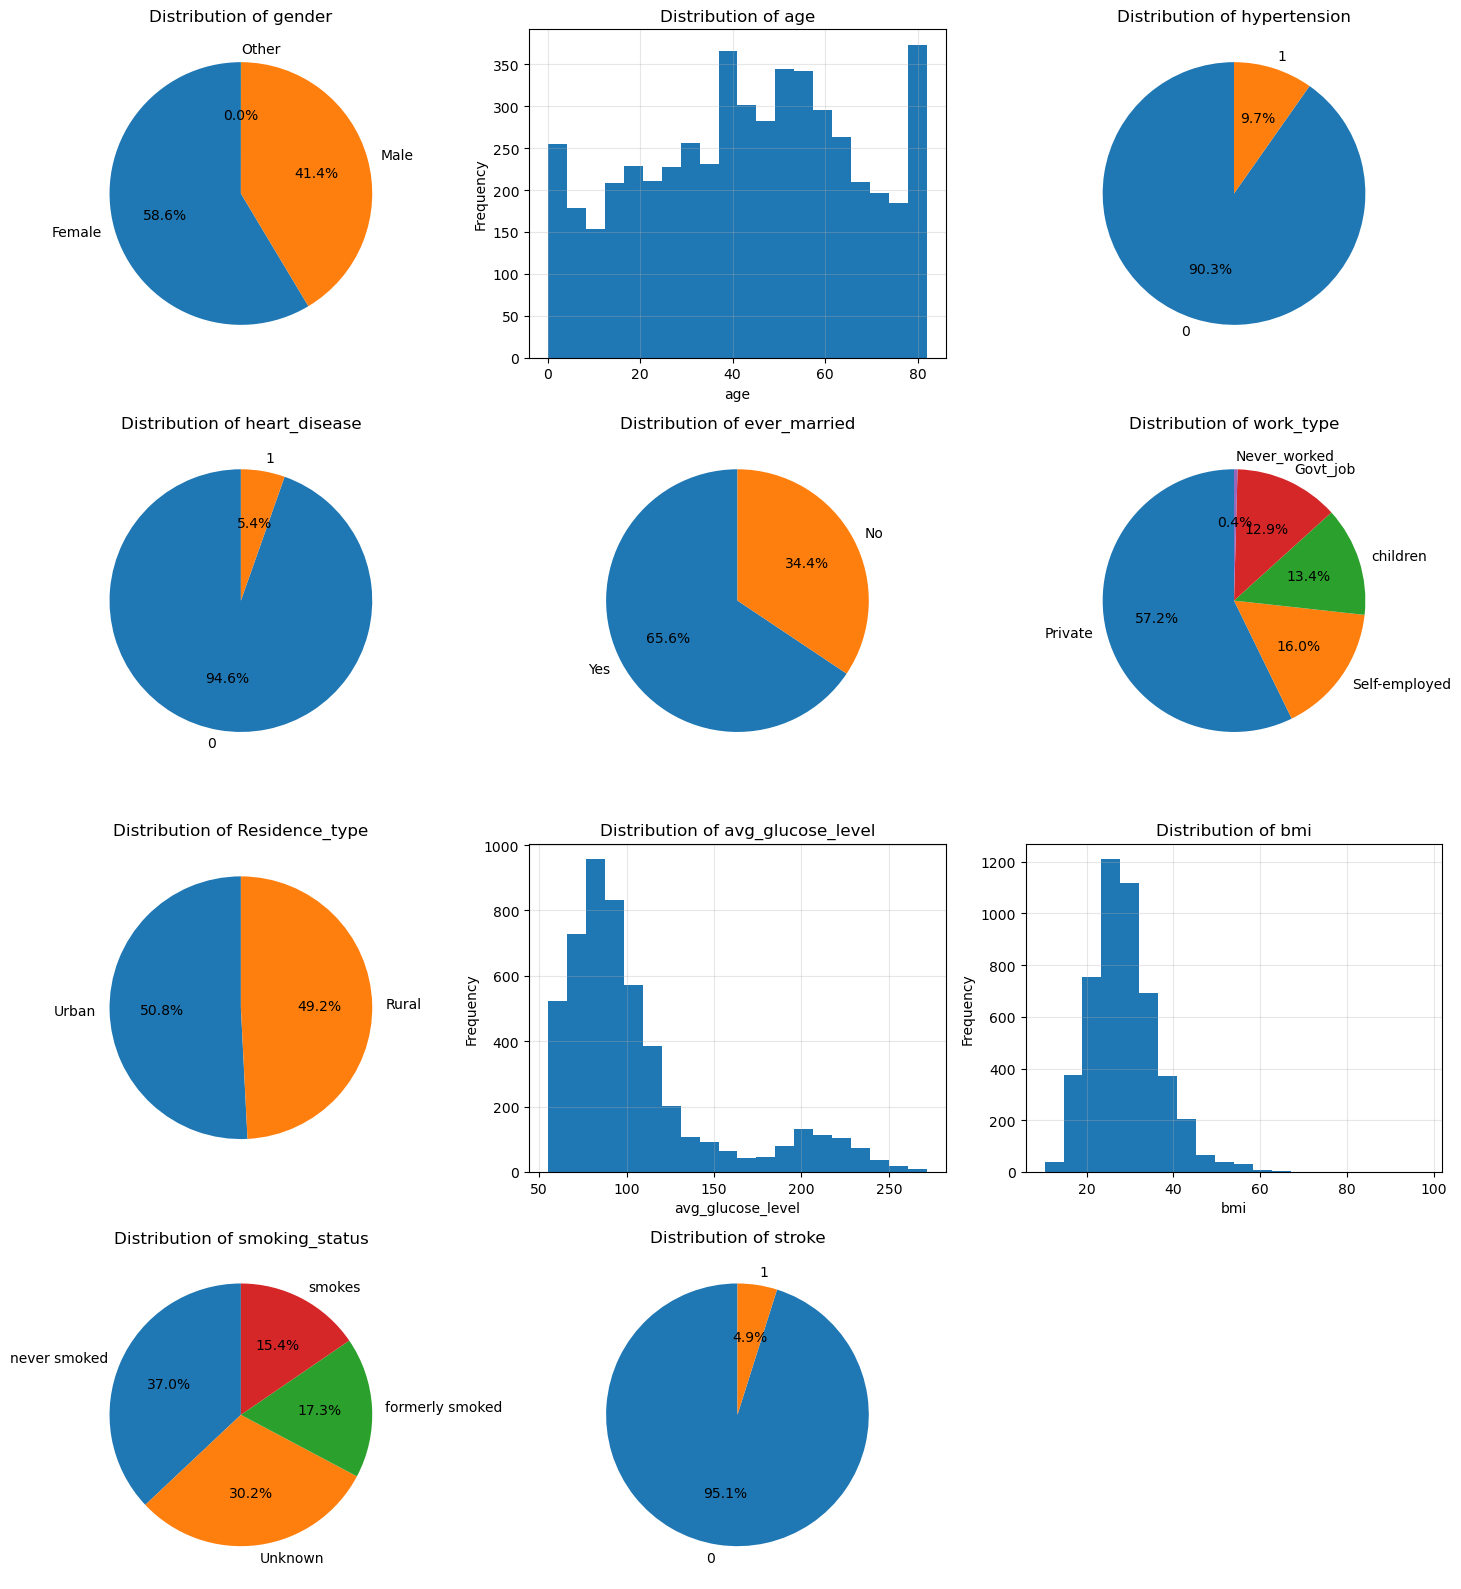

In [9]:
#EDA --> visualizing the distribution of each feature

#storing all features except id to plot + storing variables for the figure display 
features = strokeData.columns.drop(['id']) 
numCols = 3
numRows = 4

#storing non-continuous features in a list since they will look better in pie charts than bar graphs 
nonContinuous = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                        'work_type', 'Residence_type', 'smoking_status', 'stroke']

#setting figure up to plot each feature as a subplot
fig, axes = plt.subplots(numRows, numCols, figsize=(15, numRows * 4))
axes = axes.flatten()

#for each feature....
for i, col in enumerate(features):
    ax = axes[i]
    
    if col in nonContinuous:
        # Pie charts for all noncontinuous features
        valueCounts = strokeData[col].value_counts()
        ax.pie(valueCounts, labels=valueCounts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Distribution of {col}')
    else:
        # Histograms for all continuous features
        strokeData[col].hist(bins=20, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of {col}')
        ax.grid(alpha=0.3)

# Remove extra subplots (since theres only 11 features wont need the 12th subplot) 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#show plots
plt.tight_layout()
plt.show()

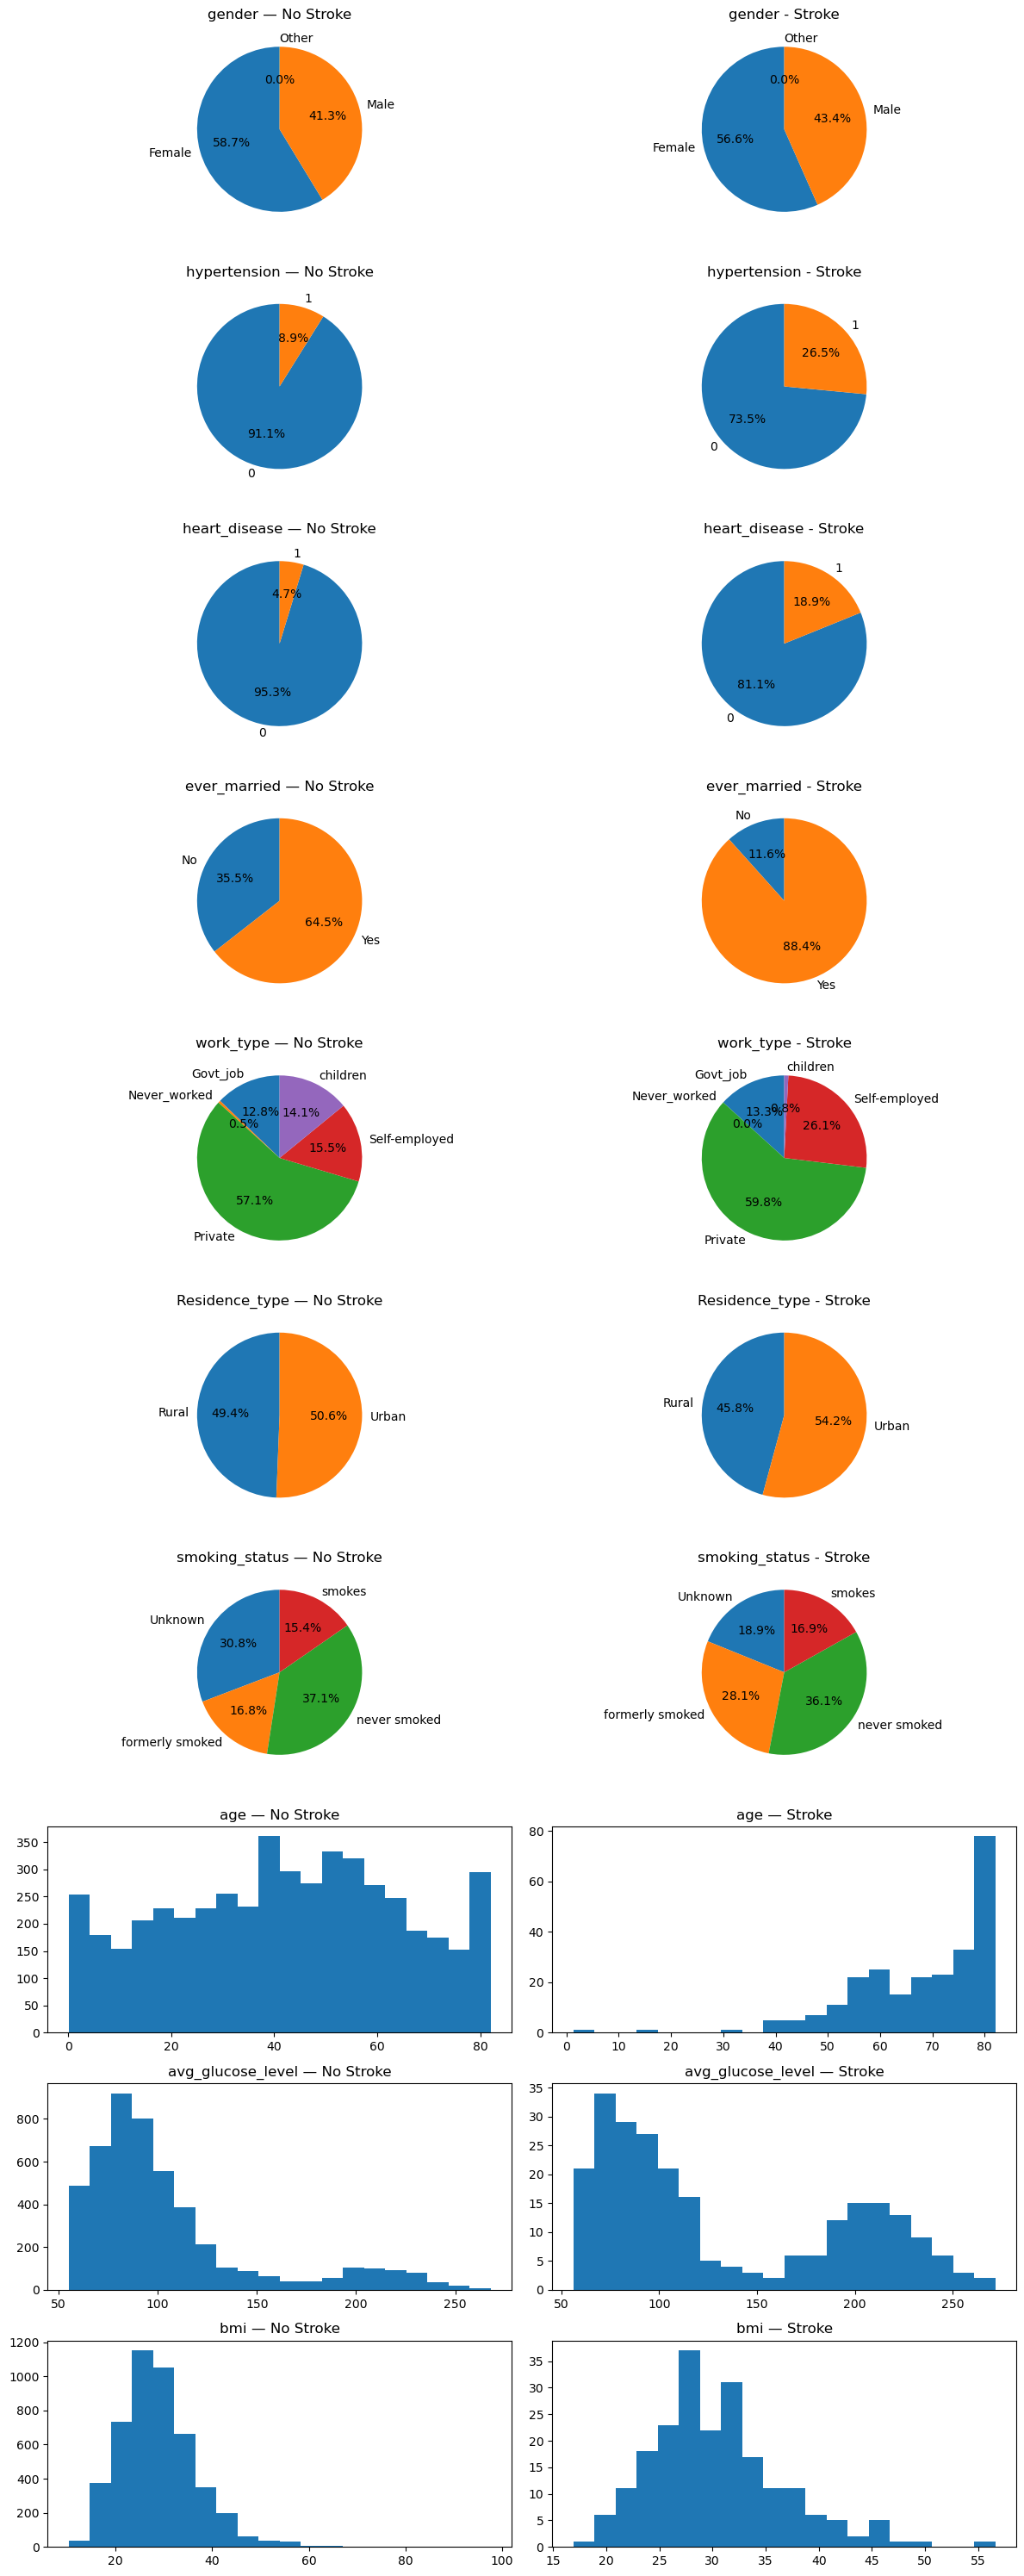

In [13]:
# EDA → Visualizing distribution of each feature by Stroke Outcome (Side-by-Side)

#storing all features except id + stroke to plot + storing variables for the figure display 
nonContinuous = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
continuous = ['age', 'avg_glucose_level', 'bmi']
numFeatures = nonContinuous + continuous
numCols = 2
numRows = 10

#storing stroke and no stroke seperately so each feature can be seperated by the stroke outcome
stroke = strokeData[strokeData['stroke'] == 1]
noStroke = strokeData[strokeData['stroke'] == 0]

#setting figure up to plot each feature as a subplot
fig, axes = plt.subplots(numRows, numCols, figsize=(12, numRows * 3))

#for each feature...
for i, col in enumerate(numFeatures):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]

    if col in nonContinuous:
        #pie charts for noncontinuous features
        noValueCounts = noStroke[col].value_counts()
        yesValueCounts = stroke[col].value_counts()
        allCounts = sorted(set(noValueCounts.index) | set(yesValueCounts.index))

        ax1.pie([noValueCounts.get(i, 0) for i in allCounts], labels=allCounts, autopct='%1.1f%%', startangle=90)
        ax1.set_title(f"{col} — No Stroke")
        ax2.pie([yesValueCounts.get(i, 0) for i in allCounts], labels=allCounts, autopct='%1.1f%%', startangle=90)
        ax2.set_title(f"{col} - Stroke")

    else:
        # histograms for continuous features
        ax1.hist(noStroke[col], bins=20)
        ax1.set_title(f"{col} — No Stroke")
        ax2.hist(stroke[col], bins=20)
        ax2.set_title(f"{col} — Stroke")

#show plots
plt.tight_layout()
plt.show()

### Step 2: Preprocessing Data

The following things were accomplished for preprocessing:
- all missing values were handled through imputation
- The id column was removed from the data since it isnt needed for the model
- Catgeorical variables were encoded (one-hot encoding)
- Data was split into training and testing sets
- Feature scaling was applied to the training set
- class weights were implemented to address class imbalance


In [15]:
#handling missing values --> from the info above BMI is the only feature with missing values
print("BMI missing values: ", strokeData['bmi'].isnull().sum())

#importing from sklearn to easily handle missing values
from sklearn.impute import SimpleImputer

#using median since its resistant to outliers which makes more sense for bmi
bmiImputer = SimpleImputer(strategy = 'median')
strokeData['bmi'] = bmiImputer.fit_transform(strokeData[['bmi']])

#verifying there are no more missing values for BMI
print("BMI missing values (after handling them): ", strokeData['bmi'].isnull().sum())


BMI missing values:  201
BMI missing values (after handling them):  0


In [17]:
#removing ID column since it isn't useful for the model
strokeData = strokeData.drop('id', axis = 1)

#verifying ID column was removed
print(list(strokeData.columns))

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [19]:
#encoding categorical variables (gender, ever_married, work_type, residence_type, smoking_status)
numericalColumns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
categoricalColumns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

#importing from sklearn to do one-hot encoding
from sklearn.preprocessing import OneHotEncoder

#initializing one-hot encoder + encoding the categorical columns
OneHot = OneHotEncoder(sparse_output = False, dtype = int)
encodedColumns = OneHot.fit_transform(strokeData[categoricalColumns])

#getting the feature names from the encoded columns and adding them to the data frame
featureNames = OneHot.get_feature_names_out(categoricalColumns)
encodedDataFrame = pd.DataFrame(encodedColumns, columns = featureNames, index = strokeData.index)

#splitting data into x and y (y = stroke or no stroke, x = everything else)
x = pd.concat([strokeData[numericalColumns], encodedDataFrame], axis = 1)
y = strokeData['stroke']

#verifying that one-hot encoding worked
print("Shape of feature matrix: ", x.shape)
print("Total features: ", x.shape[1])
print("Feature names: ", list(x.columns))
display(x.head())

Shape of feature matrix:  (5110, 21)
Total features:  21
Feature names:  ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [21]:
#splitting data into training and testing sets (80% train, 20% test) using sklearn
from sklearn.model_selection import train_test_split
    
#using random_state for reproducability
#since data is imbalanced, stratifying y so relatively same amount of 1s and 0s for stroke show up in both train & test sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [23]:
#feature scaling so all features have similar numerical values (to make gradient descent easier)

#creating scaler with sklearn
from sklearn.preprocessing import StandardScaler
featureScaler = StandardScaler()

#scaling training and test seperately
xTrainScaled = featureScaler.fit_transform(xTrain)
xTestScaled = featureScaler.fit_transform(xTest)

#verifying scaling worked
print("BEFORE scaling")
print("Training data mean: ", xTrain.mean().mean())
print("Training data std deviation: ", xTrain.std().mean())
print("Testing data mean: ", xTest.mean().mean())
print("Testing data std deviation: ", xTest.std().mean())
print("--------------------------------------------------")
print("AFTER scaling")
print("Training data mean: ", xTrainScaled.mean())
print("Training data std deviation: ", xTrainScaled.std())
print("Testing data mean: ", xTestScaled.mean())
print("Testing data std deviation: ", xTestScaled.std())

BEFORE scaling
Training data mean:  8.748077066443013
Training data std deviation:  3.9223749300014665
Testing data mean:  8.671452334358401
Testing data std deviation:  3.9183752799597573
--------------------------------------------------
AFTER scaling
Training data mean:  2.317490984214286e-18
Training data std deviation:  0.9999999999999999
Testing data mean:  2.4416422869400516e-18
Testing data std deviation:  0.9759000729485332


In [25]:
#Weighting the classes to address the imbalance
from sklearn.utils.class_weight import compute_class_weight

classWeights = compute_class_weight('balanced', classes = np.unique(yTrain), y = yTrain)
classWeightValues = {0: classWeights[0], 1: classWeights[1]} 
print("Class weights: ", classWeightValues)

Class weights:  {0: 0.5255849832861919, 1: 10.271356783919598}


### Step 3: Building + Compiling Deep Learning Model (Multi-Layer Perceptron)

In [27]:
#importing libraries (utilizing tensorflow and keras for the model)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

#setting seeds for reproduceability
np.random.seed(42)
tf.random.set_seed(42)

#getting shape of data for input layer
inputShape = xTrainScaled.shape[1]

#building multi-layer perceptron model
model = models.Sequential([
    #input layer
    layers.Input(shape=(inputShape,)),

    #1st hidden layer
    layers.Dense(128, activation='relu', name='hiddenLayer1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
        
    #2nd hidden layer
    layers.Dense(64, activation='relu', name='hiddenLayer2'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
        
    #3rd hidden layer
    layers.Dense(32, activation='relu', name='hiddenLayer3'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
        
    #4th hidden layer
    layers.Dense(16, activation='relu', name='hiddenLayer4'),
    layers.Dropout(0.2),
        
    # Output layer (binary classification)
    layers.Dense(1, activation='sigmoid', name='outputLayer')
])

#compiling model
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),loss = 'binary_crossentropy', 
    metrics = ['accuracy', keras.metrics.Precision(name = 'precision'), keras.metrics.Recall(name = 'recall'), keras.metrics.AUC(name = 'auc')])

### Step 4: Defining Computational + Environmental Metrics
The following metrics were used to measure computational efficiency: 
- Training time 
- Average & Peak CPU Utilization
- FLOPs
- RAM

The following metrics were used to measure environmental efficiency: 
- Energy consumption
- CO2 emissions
- water consumption

These metrics were calculated with the following formulas: 
- Training time (s) = End time - start time
- Average CPU Utilization (%) = Sum of all CPU samples collected / # of samples
- Peak CPU Utilization (%) = Max value from all CPU samples
- RAM (GB) = Resident set size / 1 billion
- FLOPs per layer = (2 * numInputs * numOutputs) - numOutputs
- FLOPs total (GFLOPs) = (sum of all FLOPs per layer) * numSamples * numEpochs * 3


--> NOTE for RAM: 
- Resident set size is the bytes used by the process; 1 billion coverts to GB

--> NOTE for FLOPs:
- numInputs = # of input features to the layer & numOutputs = # of output neurons in the layer
- numSamples = x3 is used to account for forward pass (x1) and backward pass (x2)


-----------------------------------------------------------------------------------

- Energy Consumption (Wh) = (power used during training * training time / 3600)
- CO2 (g) = energy consumption * carbon intensity
- water consumption (mL) = energy consumption * local water intensity

--> NOTE for Energy Consumption: 
- /3600 used to convert from seconds to hours
- Eqn referenced from following source: https://arxiv.org/pdf/2511.06694v1 but constant power was used for simplicity
- Power used during training = CPU power use + GPU power use; measured real time during a previous occurrence of training this model using the following command for mac: sudo powermetrics --samplers cpu_power (5.504 W)

--> NOTE for CO2:
- carbon intensity = 0.408 gCO2/Wh (new jersey measurement) https://app.electricitymaps.com/map/zone/US-MIDA-PJM/live/fifteen_minutes
- Eqn referenced from: https://arxiv.org/pdf/2511.06694v1 but PUE not used since just training on laptop (PUE is for data centers)

--> NOTE for water consumption:
- local water intensity = 2.18 L/kWh = 2.18 mL/Wh referenced from https://www.sciencedirect.com/science/article/pii/S0306261917305263
- A NJ water intensity wasn't available so a US average was used 
- Eqn referenced from https://arxiv.org/abs/2511.06694v1, but Ocool & Oinfra set to 1 so not included in the equation for simplicity




In [29]:
import time, psutil, os, threading

class SimpleMetrics:
    def __init__(self, name="Model", carbonIntensity=0.408, waterIntensity=2.18):
        #setting up constructer with carbon & water intensity values, model name, and cpu samples
        self.name = name
        self.carbonIntensity = carbonIntensity
        self.waterIntensity = waterIntensity
        self.process = psutil.Process(os.getpid())
        self.cpu_samples = []
    
    def start(self):
        #starts monitoring CPU usage and records training start time
        self.startTime = time.time()
        self.cpu_samples = []
        self.monitoring = True
        self.monitor_thread = threading.Thread(target=self._monitor_cpu, daemon=True)
        self.monitor_thread.start()
        #Verifying that monitoring has started
        print(f" Tracking: {self.name}")

    def _monitor_cpu(self): 
        #Background process to sample CPU utilization every 0.5s
        while self.monitoring:
            self.cpu_samples.append(psutil.cpu_percent(interval=0.1))
            time.sleep(0.5)

    def stop(self):
        #stops monitoring CPU usage and records training end time
        self.endTime = time.time()
        self.monitoring = False
        if hasattr(self, 'monitor_thread'):
            self.monitor_thread.join(timeout=2.0)
    
    def report(self, model=None, numSamples=None, numEpochs=None, powerUsage = 5.5):
        #reports computational + environmental metrics for the model

        #training time
        trainingTime = self.endTime - self.startTime

        #average and peak cpu utilization
        avg_cpu_util = sum(self.cpu_samples) / len(self.cpu_samples) if self.cpu_samples else 0
        peak_cpu_util = max(self.cpu_samples) if self.cpu_samples else 0

        #energy consumption, CO2 emissions, and water consumption
        energyConsumption =  powerUsage * trainingTime / 3600
        CO2emissions = energyConsumption * self.carbonIntensity
        waterConsumption = energyConsumption * self.waterIntensity

        #FLOPs
        FLOPs = 0
        if model and numSamples and numEpochs:
            previousUnits = inputShape
            for l in model.layers:
                if hasattr(l, 'units'):
                    layerFLOPs = 2 * previousUnits * l.units - l.units
                    FLOPs += layerFLOPs
                    previousUnits = l.units
            FLOPs *= numSamples * numEpochs * 3

        #printing metrics
        print(f"Training time  {trainingTime:.1f}s ({trainingTime/60:.2f}min)")
        print(f"Average CPU Utilization: {avg_cpu_util}% | Peak CPU Utilization: {peak_cpu_util}")
        print(f"RAM {self.process.memory_info().rss/1e9:.2f}GB")
        print(f"FLOPs {FLOPs/1e9:.2f} GFLOPs")
        print(f"Energy Consumption {energyConsumption:.6f}Wh")
        print(f"Carbon Emissions {CO2emissions:.6f}g CO₂")
        print(f"Water Consumption {waterConsumption:.4f}mL")
        
        

### Step 4: Training the model

In [31]:
#setting up early stopping to help reduce chance of overfitting
earlyStopping = EarlyStopping(monitor = 'loss', patience = 10, restore_best_weights = True, verbose = 1)


#training the model
monitor = SimpleMetrics("Baseline")              
print("Starting training")
monitor.start()              
trainingHistory = model.fit(xTrainScaled, yTrain, epochs = 100, batch_size = 32, class_weight = classWeightValues, callbacks = [earlyStopping], verbose = 1)
monitor.stop()      
print("Finished training")

#getting number of epochs used
actualEpochs = len(trainingHistory.history['loss'])

Starting training
 Tracking: Baseline
Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5187 - auc: 0.5980 - loss: 0.7497 - precision: 0.0583 - recall: 0.6333  
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.6078 - auc: 0.7339 - loss: 0.6292 - precision: 0.0806 - recall: 0.7376
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.6135 - auc: 0.7425 - loss: 0.6043 - precision: 0.0849 - recall: 0.7665
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.6597 - auc: 0.7999 - loss: 0.5283 - precision: 0.0991 - recall: 0.8099
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.6745 - auc: 0.8370 - loss: 0.4900 - precision: 0.1098 - recall: 0.8713
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.6745 - auc: 0.8302 - loss: 0.4839 - precision: 0.1053 - recall: 0.8250
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.6652 - auc: 0.8201 - loss: 0.4902 - precision: 0.1038

### Step 5: Evaluating model on test set + showing metrics

In [33]:
#evaluate model on the test set
testResults = model.evaluate(xTestScaled, yTest, verbose = 0)

#print metrics stored from the compiled model
print("Test set performance")
print("Loss", testResults[0])
print("Accuracy", testResults[1])
print("Precision", testResults[2])
print("Recall", testResults[3])
print("AUC", testResults[4])

#predicted probabilities for test set data
yTestPredProbability = model.predict(xTestScaled, verbose = 0)

#converting predicted probabilities to class labels
yTestPred = (yTestPredProbability > 0.5).astype(int).flatten()

#calculate + print f1 score 
f1 = f1_score(yTest, yTestPred)
print("F1 score: ", f1)

Test set performance
Loss 0.38116198778152466
Accuracy 0.7808219194412231
Precision 0.14049586653709412
Recall 0.6800000071525574
AUC 0.8049484491348267
F1 score:  0.2328767123287671


In [35]:
#Computational & Environmental Metrics
monitor.report(model, len(xTrainScaled), actualEpochs)

Training time  12.7s (0.21min)
Average CPU Utilization: 22.861904761904764% | Peak CPU Utilization: 45.1
RAM 0.78GB
FLOPs 27.80 GFLOPs
Energy Consumption 0.019329Wh
Carbon Emissions 0.007886g CO₂
Water Consumption 0.0421mL


In [37]:
#classification report
print(classification_report(yTest, yTestPred, target_names=['no stroke', 'stroke'], digits = 4))

              precision    recall  f1-score   support

   no stroke     0.9795    0.7860    0.8721       972
      stroke     0.1405    0.6800    0.2329        50

    accuracy                         0.7808      1022
   macro avg     0.5600    0.7330    0.5525      1022
weighted avg     0.9384    0.7808    0.8409      1022



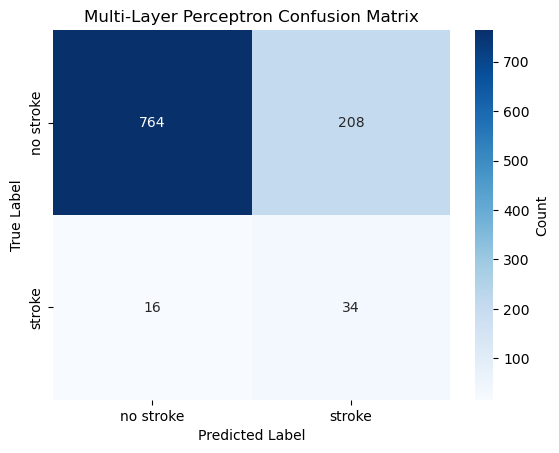

In [39]:
#confusion matrix
confusionMatrix = confusion_matrix(yTest, yTestPred)

#plotting confusion matrix
sns.heatmap(confusionMatrix, annot = True, fmt = 'd', cmap = 'Blues',
           xticklabels = ['no stroke', 'stroke'],
           yticklabels = ['no stroke', 'stroke'],
           cbar_kws = {'label': 'Count'})
plt.title("Multi-Layer Perceptron Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

ROC AUC Score:  0.8045267489711935


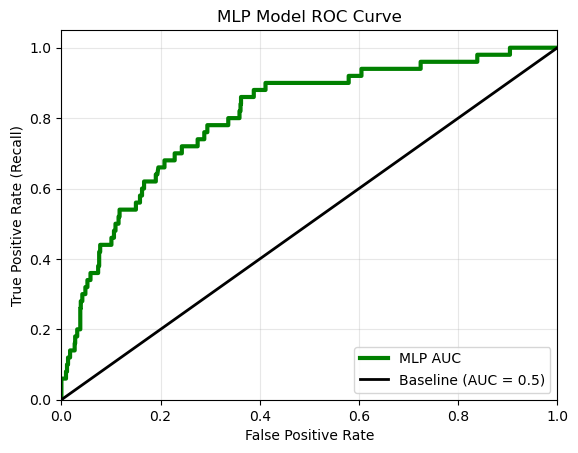

In [41]:
#ROC curve
#getting false positive rate, true positive rate, and decision thresholds (from sklearn metrics)
fPosRate, tPosRate, thresholds = roc_curve(yTest, yTestPredProbability)

#getting AUC (from sklearn metrics)
AUC = roc_auc_score(yTest, yTestPredProbability)

print("ROC AUC Score: ", AUC)

#plotting ROC curve + baseline 
plt.plot(fPosRate, tPosRate, color = 'green', lw = 3, label = "MLP AUC")
plt.plot([0, 1], [0, 1], color = 'black', lw = 2, label = "Baseline (AUC = 0.5)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("MLP Model ROC Curve")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

#show plot
plt.show()

### Step 6: Hyperparameter Tuning
In this step, hyperparameters were tuned a couple times to see which model produced the best results. Hyperparameter tuning included...
- Testing different numbers of hidden layers
- Testing different numbers of neurons per hidden layers
- Testing different dropout rates
- Testing different learning rates
- Testing different class weights

Model configs were evaluated based off of F1 score since this metric indicates a balance of precision and recall and will indicate how well the model does for both stroke and no-stroke cases instead of just one category or the other. 

In [43]:
#general MLP model function
def mlp(hiddenLayer = (128, 64, 32, 16), dropout = 0.3, learningRate = 0.001):
    """
    This function creates & returns a MLP model based on which parameters are specified. 
    Specified parameters include amount of hidden layers, neurons in each hidden layer, dropout, and learningRate
    """
   
    model = models.Sequential()
    
    #input layer (using shape from model in step 3)
    model.add(layers.Input(shape=(inputShape,)))

    #hidden layers
    for neurons in hiddenLayer:
        model.add(layers.Dense(neurons, activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout))

    #output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    #compile model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learningRate),loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall'),keras.metrics.AUC(name='auc')])
    
    return model



In [45]:
#different model configurations to test
configs = [
    {'name': 'Baseline', 'hiddenLayer': (128, 64, 32, 16), 'dropout': 0.3, 'learningRate': 0.001, 'classWeight': {0: 1.0, 1: 10.0}},
    {'name': 'Larger Neurons', 'hiddenLayer': (256, 128, 64, 32), 'dropout': 0.3, 'learningRate': 0.001, 'classWeight': {0: 1.0, 1: 10.0}},
    {'name': 'Deeper Network', 'hiddenLayer': (256, 128, 64, 32, 16), 'dropout': 0.3, 'learningRate': 0.001, 'classWeight': {0: 1.0, 1: 10.0}},
    {'name': 'Shallower Network', 'hiddenLayer': (128, 64), 'dropout': 0.3, 'learningRate': 0.001, 'classWeight': {0: 1.0, 1: 10.0}},
    {'name': 'Shallower Network Smaller Neurons', 'hiddenLayer': (64, 32), 'dropout': 0.3, 'learningRate': 0.001, 'classWeight': {0: 1.0, 1: 10.0}},
    {'name': 'Low Dropout', 'hiddenLayer': (128, 64, 32, 16), 'dropout': 0.2, 'learningRate': 0.001, 'classWeight': {0: 1.0, 1: 10.0}},
    {'name': 'High Dropout', 'hiddenLayer': (128, 64, 32, 16), 'dropout': 0.4, 'learningRate': 0.001, 'classWeight': {0: 1.0, 1: 10.0}},
    {'name': 'Higher Dropout', 'hiddenLayer': (128, 64, 32, 16), 'dropout': 0.5, 'learningRate': 0.001, 'classWeight': {0: 1.0, 1: 10.0}},
    {'name': 'Highest Dropout', 'hiddenLayer': (128, 64, 32, 16), 'dropout': 0.6, 'learningRate': 0.001, 'classWeight': {0: 1.0, 1: 10.0}},
    {'name': 'Higher LR', 'hiddenLayer': (128, 64, 32, 16), 'dropout': 0.3, 'learningRate': 0.002, 'classWeight': {0: 1.0, 1: 10.0}},
    {'name': 'Lower LR', 'hiddenLayer': (128, 64, 32, 16), 'dropout': 0.3, 'learningRate': 0.0005, 'classWeight': {0: 1.0, 1: 10.0}},
    {'name': 'Stronger Weights', 'hiddenLayer': (128, 64, 32, 16), 'dropout': 0.3, 'learningRate': 0.001, 'classWeight': {0: 1.0, 1: 15.0}},
    {'name': 'Weaker Weights', 'hiddenLayer': (128, 64, 32, 16), 'dropout': 0.3, 'learningRate': 0.001, 'classWeight': {0: 1.0, 1: 8.0}},
    {'name': 'Combo', 'hiddenLayer': (128, 64, 32, 16), 'dropout': 0.5, 'learningRate': 0.0005, 'classWeight': {0: 1.0, 1: 10.0}},
    
]

print(f"Testing {len(configs)} configurations...\n")

#creating to store the results of the different configs
results = []

#for each config....
for i, config in enumerate(configs, 1):
    print(f"[{i}/{len(configs)}] Testing: {config['name']}")

    #setting up to monitor computational + environmental metrics
    monitor = SimpleMetrics(name = config['name'])
    
    # Build and train model config w/ early stopping implemented
    model = mlp(hiddenLayer=config['hiddenLayer'], dropout=config['dropout'], learningRate=config['learningRate'])
    earlyStop = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True, verbose=0)
    monitor.start()
    history = model.fit(xTrainScaled, yTrain, epochs=100, batch_size=32, class_weight=config['classWeight'], callbacks=[earlyStop], verbose=0)
    monitor.stop()
    
    #evaluate model config on the test set
    yTestPredProb = model.predict(xTestScaled, verbose=0).flatten()
    yTestPred = (yTestPredProb >= 0.5).astype(int)
    
    #store model metrics
    acc = accuracy_score(yTest, yTestPred)
    prec = precision_score(yTest, yTestPred, zero_division=0)
    rec = recall_score(yTest, yTestPred, zero_division=0)
    f1 = f1_score(yTest, yTestPred, zero_division=0)
    auc = roc_auc_score(yTest, yTestPredProb)
    
    #printing the f1 score for each model config
    print(f"  F1: {f1:.4f}")
    
    # Storing model config results
    results.append({
        'Name': config['name'],
        'Architecture': str(config['hiddenLayer']),
        'Dropout': config['dropout'],
        'Learning Rate': config['learningRate'],
        'Class Weight': f"1:{config['classWeight'][1]}",
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'AUC': auc,
        'Epochs': len(history.history['loss'])
    })

#creating results data frame
resultsDF = pd.DataFrame(results)
resultsDFSorted = resultsDF.sort_values('F1', ascending=False)

#storing best result
bestResult = max(results, key=lambda x: x['F1'])  

#print summary of results sorted by f1 score
print("Summary of Results (sorted by F1 score)")
print("-" * 75)
print(resultsDFSorted[['Name', 'Accuracy','F1', 'Precision', 'Recall', 'AUC']].to_string(index=False))

#print the top 3 configurations
print("Top 3 Configurations")
print("-" * 75)
for i, row in resultsDFSorted.head(3).iterrows():
    rank = resultsDFSorted.index.get_loc(i) + 1
    print(f"\n#{rank}: {row['Name']}")
    print(f"  Architecture: {row['Architecture']}")
    print(f"  Dropout: {row['Dropout']}, LR: {row['Learning Rate']}, Weights: {row['Class Weight']}")
    print(f"  F1: {row['F1']:.4f}, Accuracy: {row['Accuracy']:.4f}, Precision: {row['Precision']:.4f}, Recall: {row['Recall']:.4f}")

#printing all the config results out for reference
print("full results table")
print("-" * 75)
print(resultsDFSorted.to_string(index=False))

Testing 14 configurations...

[1/14] Testing: Baseline
 Tracking: Baseline
  F1: 0.2016
[2/14] Testing: Larger Neurons
 Tracking: Larger Neurons
  F1: 0.1731
[3/14] Testing: Deeper Network
 Tracking: Deeper Network
  F1: 0.1782
[4/14] Testing: Shallower Network
 Tracking: Shallower Network
  F1: 0.1871
[5/14] Testing: Shallower Network Smaller Neurons
 Tracking: Shallower Network Smaller Neurons
  F1: 0.2489
[6/14] Testing: Low Dropout
 Tracking: Low Dropout
  F1: 0.2188
[7/14] Testing: High Dropout
 Tracking: High Dropout
  F1: 0.2446
[8/14] Testing: Higher Dropout
 Tracking: Higher Dropout
  F1: 0.2871
[9/14] Testing: Highest Dropout
 Tracking: Highest Dropout
  F1: 0.2902
[10/14] Testing: Higher LR
 Tracking: Higher LR
  F1: 0.1970
[11/14] Testing: Lower LR
 Tracking: Lower LR
  F1: 0.2427
[12/14] Testing: Stronger Weights
 Tracking: Stronger Weights
  F1: 0.2491
[13/14] Testing: Weaker Weights
 Tracking: Weaker Weights
  F1: 0.2482
[14/14] Testing: Combo
 Tracking: Combo
  F1: 0.25

### Step 7: Training Best Model Based on Hyperparamter Tuning + Outputting Metrics

In [51]:
#getting the best config based on the results
bestConfig = next(config for config in configs if config['name'] == bestResult['Name'])

#building and training the best model config w/ early stoppinf implemented
print("Training best model config...")
bestModel = mlp(hiddenLayer=bestConfig['hiddenLayer'], dropout=bestConfig['dropout'], learningRate=bestConfig['learningRate'])
earlyStop = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True, verbose=0)
bestHistory = bestModel.fit(xTrainScaled, yTrain, epochs=100, batch_size=32, class_weight=bestConfig['classWeight'], callbacks=[earlyStop], verbose=1)
print("Finished training")

# Get predictions
yTestPredProbBest = bestModel.predict(xTestScaled, verbose=0).flatten()
yTestPredBest = (yTestPredProbBest >= 0.5).astype(int)

Training best model config...
Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5220 - auc: 0.5228 - loss: 1.3191 - precision: 0.0498 - recall: 0.5373
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.6086 - auc: 0.4858 - loss: 1.1602 - precision: 0.0459 - recall: 0.3938
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.6728 - auc: 0.5813 - loss: 1.0101 - precision: 0.0590 - recall: 0.4264
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.7354 - auc: 0.6045 - loss: 0.9397 - precision: 0.0700 - recall: 0.3986     
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.7504 - auc: 0.5713 - loss: 0.9520 - precision: 0.0564 - recall: 0.2778     
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7869 - auc: 0.6262 - loss: 0.8872 - precision: 0.0632 - recall: 0.2636     
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.8241 - auc: 0.5964 - loss: 0.8920 - precision: 0

In [55]:
#printing metrics
print("Accuracy: ", accuracy_score(yTest, yTestPredBest))
print("Precision: ", precision_score(yTest, yTestPredBest))
print("Recall: ", recall_score(yTest, yTestPredBest))
print("F1 score: ", f1_score(yTest, yTestPredBest))

Accuracy:  0.8522504892367906
Precision:  0.2046783625730994
Recall:  0.7
F1 score:  0.3167420814479638


In [57]:
#computational and environmental metrics 

#getting number of epochs used 
actualEpochs = len(bestHistory.history['loss'])

# Calculate and print metrics
metrics = monitor.report( model=model, numSamples=len(xTrainScaled), numEpochs=actualEpochs, powerUsage=5.5)

Training time  14.2s (0.24min)
Average CPU Utilization: 15.213043478260868% | Peak CPU Utilization: 53.9
RAM 1.45GB
FLOPs 32.71 GFLOPs
Energy Consumption 0.021634Wh
Carbon Emissions 0.008827g CO₂
Water Consumption 0.0472mL


In [59]:
#classification Report
print(classification_report(yTest, yTestPredBest))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       972
           1       0.20      0.70      0.32        50

    accuracy                           0.85      1022
   macro avg       0.59      0.78      0.62      1022
weighted avg       0.94      0.85      0.89      1022



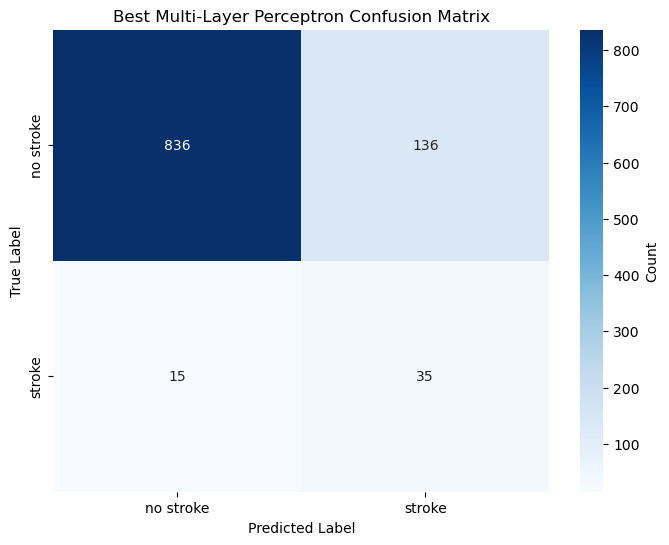

In [67]:
#confusion matrix
cmBest = confusion_matrix(yTest, yTestPredBest)

#plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmBest, annot=True, fmt='d', cmap='Blues', xticklabels = ['no stroke', 'stroke'], yticklabels = ['no stroke', 'stroke'],cbar_kws = {'label': 'Count'})
plt.title("Best Multi-Layer Perceptron Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

ROC AUC Score:  0.825864197530864


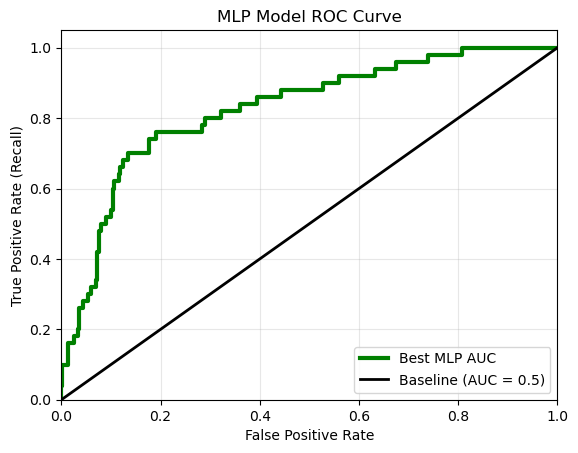

In [65]:
#ROC Curve

#getting false positive rate, true positive rate, and decision thresholds (from sklearn metrics)
fprBest, tprBest, thresholdsBest = roc_curve(yTest, yTestPredProbBest)

#getting AUC (from sklearn metrics)
AUCbest = roc_auc_score(yTest, yTestPredProbBest)

print("ROC AUC Score: ", AUCbest)

#plotting ROC curve + baseline 
plt.plot(fprBest, tprBest, color = 'green', lw = 3, label = "Best MLP AUC")
plt.plot([0, 1], [0, 1], color = 'black', lw = 2, label = "Baseline (AUC = 0.5)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("MLP Model ROC Curve")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

#show plot
plt.show()